<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Ознакомление-с-данными" data-toc-modified-id="Ознакомление-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ознакомление с данными</a></span></li><li><span><a href="#Подготовка-и-разбиение-на-выборки" data-toc-modified-id="Подготовка-и-разбиение-на-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка и разбиение на выборки</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Блок-модели-Случайный-Лес" data-toc-modified-id="Блок-модели-Случайный-Лес-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Блок модели Случайный Лес</a></span></li><li><span><a href="#Блок-модели-Логистическая-Регрессия" data-toc-modified-id="Блок-модели-Логистическая-Регрессия-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Блок модели Логистическая Регрессия</a></span></li><li><span><a href="#Сравним-результаты-на-тестовой-выборке" data-toc-modified-id="Сравним-результаты-на-тестовой-выборке-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Сравним результаты на тестовой выборке</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Блок-пользовательских-функций" data-toc-modified-id="Блок-пользовательских-функций-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Блок пользовательских функций</a></span></li><li><span><a href="#Способ-1" data-toc-modified-id="Способ-1-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Способ 1</a></span></li><li><span><a href="#Способ-2" data-toc-modified-id="Способ-2-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Способ 2</a></span></li><li><span><a href="#Способ-3" data-toc-modified-id="Способ-3-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Способ 3</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
pd.options.mode.chained_assignment = None # В VS Code почему-то считается чем то зазорным писать значения через срезы. Что в этом плохого, не ясно. Уберу предупреждение об этом.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix

In [12]:
#Сделаю, чтобы данные подгружались как на локальной машине, так и на сервере
try:
    data_full = pd.read_csv('/datasets/Churn.csv')
except:
    data_full = pd.read_csv(r"C:\project_3\Churn.csv")

### Ознакомление с данными

In [ ]:
data_full.info()
data_full.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Пропусков почти нет, типы корректны.   
Имеющиеся 9 пропусков в поле Tenure (сколько лет человек клиент банка) для корректной работы моделей заполню нулями.
 
Уникальный номер клиента обеспечивает отсутствие скрытых дубликатов.  
Проверю на дубликаты столбец с идентефикационным номером клиента. Если номера не повторяются, то дубликатов нет.

Подробнее посмотрю на вопрос с пропусками в Tenure

In [ ]:
print(f"Доля пропусков: {data_full['Tenure'].isna().sum()/data_full['Tenure'].count():.3%}")
print(f"Медиана: {data_full['Tenure'].median()}")
print(f"Среднее: {data_full['Tenure'].mean():.3}")
print(f"Мода: {data_full['Tenure'].mode()}")

Доля пропусков: 9.999%
Медиана: 5.0
Среднее: 5.0
Мода: 0    1.0
dtype: float64


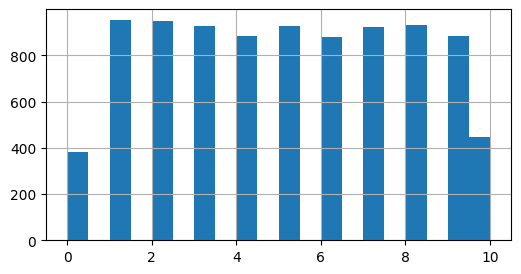

In [ ]:
#Посмотрю частоту значение в столбце Tenure
data_full['Tenure'].dropna().hist(bins=20,figsize=(6,3)); #без принудительной установки корзин строит некорретно

In [ ]:
#Проверю корреляцию Tenure с другими колличесвенными признаками
#Увы, её нет ни с одним количественным признаком
print(data_full['Tenure'].corr(data_full['Age']))
print(data_full['Tenure'].corr(data_full['EstimatedSalary']))
print(data_full['Tenure'].corr(data_full['Balance']))
data_full['Tenure'].corr(data_full['NumOfProducts'])

-0.013134384930796522
0.010519878955962176
-0.00791069799207847


0.011978980549193174

In [ ]:
#Заполню пропуски медианой и проверю
data_full['Tenure'].fillna(data_full['Tenure'].median(),inplace=True);
len(data_full['Tenure'])

10000

In [ ]:
#Действительно, ли они все номера клиентов уникальны
print(len(data_full['CustomerId'].unique()))

10000


### Подготовка и разбиение на выборки

Думаю, что 3 признака (Индекс строки в данных, Идентификатор клиента и Фамилия) не влияют на целевой признак.  
Уберу их из данных, чтобы избежать шумов. 

In [ ]:
data = data_full.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

Переведу категориальные признаки в числовые методом OHE

In [ ]:
# Взял дефолтное решение без дамми ловушки (отбросил первый столбец)
data_ohe = pd.get_dummies(data, drop_first=True)

In [ ]:
#Вариант решения через OneHotEncoder закоментил, после разбиения он не работает.
#transformer_OHE = make_column_transformer((OneHotEncoder(drop='first'), ['Gender','Geography']), remainder='passthrough')
#transformed = transformer_OHE.fit_transform(data)
#data_ohe = pd.DataFrame(transformed, columns=transformer_OHE.get_feature_names())

In [ ]:
features = data_ohe.drop(columns='Exited')
target = data_ohe['Exited']

Разделю набор 2 раза, чтобы получить обучающий/валидационный/тестовый наборы в отношении 3/1/1
Сделаю это за 2 вызова train_test_split

In [ ]:
features, features_train, target, target_train = train_test_split(features, target, test_size=0.6, random_state=12345, stratify=target)
features_test, features_valid, target_test, target_valid = train_test_split(features, target, test_size=0.5, random_state=12345, stratify=target)

Проверю разбиение на выборки.  
Всё хорошо: баланс одинаковый во всех выборках, размеры выборок соответсвуют

In [ ]:
print(target_train.value_counts(normalize = True))
print(target_valid.value_counts(normalize = True))
target_test.value_counts(normalize = True)

0    0.796333
1    0.203667
Name: Exited, dtype: float64
0    0.7965
1    0.2035
Name: Exited, dtype: float64


0    0.796
1    0.204
Name: Exited, dtype: float64

In [ ]:
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000,)
(2000,)
(2000,)
(6000, 11)
(2000, 11)
(2000, 11)


Приведу числовые признаки к одинаковому масштабу

In [ ]:
#Для начала выберу какие признаки числовые и их нужно обработать
numeric = ['EstimatedSalary', 'NumOfProducts', 'Balance', 'Tenure', 'Age', 'CreditScore']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [ ]:
#Проверю, что получилось. Прекрасно, можно учить модель.
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5238,0.753887,-0.845717,-0.725914,0.759823,-0.893492,1,0,1.076681,0,0,1
784,1.002729,1.789258,0.724101,0.634341,-0.893492,1,1,1.572643,1,0,1
6541,1.013097,-0.375186,-0.000906,0.460392,-0.893492,1,1,0.865384,0,1,1
492,-0.117059,-0.092867,-0.363410,0.075528,0.807317,0,1,0.324444,0,0,0
534,-1.039847,0.095345,-0.000906,0.602856,-0.893492,1,0,-0.806007,0,0,0


## Исследование задачи

Изучу баланс классов во всех выборках  
Везде схожая картина - положительных исходов ок. 20%. Очевиден дисбаланс классов.

In [ ]:
print(target_train.value_counts(normalize = True))
print(target_valid.value_counts(normalize = True))
target_test.value_counts(normalize = True)

0    0.796333
1    0.203667
Name: Exited, dtype: float64
0    0.7965
1    0.2035
Name: Exited, dtype: float64


0    0.796
1    0.204
Name: Exited, dtype: float64

- Обучу модели Случайный Лес и Логистическая регрессия без корректировки баланса классов. Подберу оптимальные гиперпараметры. 
- Оценю точность, F1 меру и AUC-ROC. Выберу лучшую модель.

#### Блок модели Случайный Лес

In [ ]:
best_model_RF = None
best_depth = 1
best_max_n_estimators = 20
score_RF = 0
for depth in range(1, 100):
    model_RF = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=depth) #Для сходимости результатов зафиксирую случайность
    model_RF.fit(features_train,target_train)
    if model_RF.score(features_valid, target_valid) > score_RF:
        score_RF = model_RF.score(features_valid, target_valid)
        best_depth = depth
print("Оптимальная глубина = ", best_depth)

for estimators in range(1, 100):
    model_RF = RandomForestClassifier(random_state=12345, n_estimators=estimators, max_depth=best_depth) #Для сходимости результатов зафиксирую случайность
    model_RF.fit(features_train,target_train)
    if model_RF.score(features_valid, target_valid) > score_RF:
        score_RF = model_RF.score(features_valid, target_valid)
        best_max_n_estimators = estimators 
        best_model_RF = model_RF
print('Оптимальное число деревьев = ', best_max_n_estimators)

Оптимальная глубина =  11
Оптимальное число деревьев =  31


#### Блок модели Логистическая Регрессия

In [ ]:
best_model_LR = None
best_max_iter = 100
score_LR = 0
for iter in range(100, 1000):
    model_LR = LogisticRegression(random_state=12345, max_iter=iter, solver='liblinear') #Для сходимости результатов зафиксирую случайность
    model_LR.fit(features_train,target_train)
    if model_LR.score(features_valid, target_valid) > score_LR:
        score_LR = model_LR.score(features_valid, target_valid)
        best_max_iter  = iter
        best_model_LR = model_LR
print("Оптимальное число итераций = ", best_max_iter)

Оптимальное число итераций =  100


Пользовательская функиция для расчёта и вывода метрик моделей

In [ ]:
def Control_Desc_func(model_name, model:object, target, features):
    predictions = model.predict(features)
    probabilities_one = model.predict_proba(features)[:,1] 
    print('_________________________________________________________________')
    print('Метрики для модели', model_name)
    print('Доля правильных ответов (Acccuracy) = ', model.score(features, target))
    print('F1 Мера = ', f1_score(target, predictions).round(5))
    print('Площадь под ROC кривой = ', roc_auc_score(target_test, probabilities_one).round(5))
    print('Баланс классов в предсказании:')
    print(pd.Series(predictions).value_counts(normalize=True))
    print('_________________________________________________________________')

#### Сравним результаты на тестовой выборке

In [ ]:
print("Справочно: баланс классов в тестовой выборке:")
print(target_test.value_counts(normalize = True))
Control_Desc_func(model_name='Логистическая регрессия', model=best_model_LR, target=target_test, features=features_test)
Control_Desc_func(model_name="Случайный Лес", model=best_model_RF, target=target_test, features=features_test)

Справочно: баланс классов в тестовой выборке:
0    0.796
1    0.204
Name: Exited, dtype: float64
_________________________________________________________________
Метрики для модели Логистическая регрессия
Доля правильных ответов (Acccuracy) =  0.8195
F1 Мера =  0.34483
Площадь под ROC кривой =  0.75943
Баланс классов в предсказании:
0    0.9285
1    0.0715
dtype: float64
_________________________________________________________________
_________________________________________________________________
Метрики для модели Случайный Лес
Доля правильных ответов (Acccuracy) =  0.856
F1 Мера =  0.53846
Площадь под ROC кривой =  0.84484
Баланс классов в предсказании:
0    0.892
1    0.108
dtype: float64
_________________________________________________________________


In [ ]:
confusion_matrix(target_test,best_model_RF.predict(features_test))

array([[1544,   48],
       [ 240,  168]], dtype=int64)

ВЫВОДЫ:
- Модель Случайный Лес явно работает лучше: показывает и метрики выше и баланс классов ближе к реальному
- Баланс классов у Случайнгого Леса явно не идеальный - более чем в 2 раза меньше доля редкого класса, чем в тестовой выборке
- Единственно в чём Логиистическая регрессия лучше - быстродействие, но в нашей задаче разница не ощущается
- Удалось получить неплохой показатель F1 мер, но до целевого уровня (0.59+) модель не дотягивает
- Возможно, если выбрать модель Случайный лес подобраными гиперпараментрами и обучить её на данных с меньшим дисбалансом удастся добиться целевого уровня F1

## Борьба с дисбалансом

#### Блок пользовательских функций

In [ ]:
# Функция для увеличения выборки по определённому классу (upsampling)
def upsample(features, target, repeat): 
    features_zeros = features[target == 0] 
    features_ones = features[target == 1] 
    target_zeros = target[target == 0] 
    target_ones = target[target == 1] 
 
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) 
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) 
     
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345) 
     
    return features_upsampled, target_upsampled

In [ ]:
# Функция для уменьшения выборки по определённому классу (downsampling)
def downsample(features, target, fraction): 
    features_zeros = features[target == 0] 
    features_ones = features[target == 1] 
    target_zeros = target[target == 0] 
    target_ones = target[target == 1] 
 
    features_downsampled = pd.concat( 
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) 
    target_downsampled = pd.concat( 
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]) 
     
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345) 
     
    return features_downsampled, target_downsampled

#### Способ 1  
Для начала попробую просто активировать учёт баланса классов при обучении модели  
Активирую парараметр class_weight  

In [ ]:
model_balance_RF_class_w = RandomForestClassifier(random_state=12345, max_depth=best_depth, n_estimators=best_max_n_estimators, class_weight='balanced')
model_balance_RF_class_w.fit(features_train, target_train);

#### Способ 2  
Обучу модель на выборке с увеличенным количеством объектов класса 1 (метод upsampling)

In [ ]:
print('Кол-во записей в обучающей выборке:',len(target_train))
print('Исходный баланс классов в обучающей выборке:')
target_train.value_counts(normalize=True).round(3)

Кол-во записей в обучающей выборке: 6000
Исходный баланс классов в обучающей выборке:


0    0.796
1    0.204
Name: Exited, dtype: float64

Всего 6000 объектов, из них ок. 80% - это нули. Нужно приблизиться к балансу 50/50%.  
Продублирую 4 раза признаки с классом 1, добавлю их в обучающаю выборку и перемешаю 

In [ ]:
features_train_upsample, target_train_upsample = upsample(target=target_train, features=features_train, repeat=4)

In [ ]:
features_train_upsample, target_train_upsample = upsample(target=target_train, features=features_train, repeat=4)
#Проверка - Всё ОК
print('Кол-во элементов в обучаюшей выборке',len(features_train_upsample))
print('------------------------------------')
print('Кол-во элементов в целевом признаке обучаюшей выборки',len(target_train_upsample))
print('Баланс классов в целевом признаке обучаюшей выборки:',target_train_upsample.value_counts(normalize=True).round(3))

Кол-во элементов в обучаюшей выборке 9666
------------------------------------
Кол-во элементов в целевом признаке обучаюшей выборки 9666
Баланс классов в целевом признаке обучаюшей выборки: 1    0.506
0    0.494
Name: Exited, dtype: float64


In [ ]:
model_upsample = RandomForestClassifier(random_state=12345,max_depth=best_depth,n_estimators=best_max_n_estimators)
model_upsample.fit(features_train_upsample, target_train_upsample);

#### Способ 3  
Обучу модель на выборке с уменьшенным количеством объектов класса 0 (метод downsampling)

In [ ]:
features_train_downsample, target_train_downsample = downsample(target=target_train,features=features_train,fraction=0.248)
print('Кол-во элементов в обучаюшей выборке',len(features_train_downsample))
print('------------------------------------')
print('Кол-во элементов в целевом признаке обучаюшей выборки',len(target_train_downsample))
print('Баланс классов в целевом признаке обучаюшей выборки:',target_train_downsample.value_counts(normalize=True).round(3))

Кол-во элементов в обучаюшей выборке 2407
------------------------------------
Кол-во элементов в целевом признаке обучаюшей выборки 2407
Баланс классов в целевом признаке обучаюшей выборки: 1    0.508
0    0.492
Name: Exited, dtype: float64


In [ ]:
model_downsample = RandomForestClassifier(random_state=12345,max_depth=best_depth,n_estimators=best_max_n_estimators)
model_downsample.fit(features_train_downsample, target_train_downsample);

In [ ]:
print('Сравнение F1 меры моделей до и после корректировки классов')
print('----------------------------------------------------------')
print('Справочно исходная модель до балансировки классов', f1_score(target_test, best_model_RF.predict(features_test)).round(5))
print('Модель 1 с опцией парараметр class_weight:', f1_score(target_test, model_balance_RF_class_w.predict(features_test)).round(5))
print('Модель 2 upsampling:', f1_score(target_test, model_upsample.predict(features_test)).round(5))
print('Модель 3 downsampling:', f1_score(target_test, model_downsample.predict(features_test)).round(5))

Сравнение F1 меры моделей до и после корректировки классов
----------------------------------------------------------
Справочно исходная модель до балансировки классов 0.53846
Модель 1 с опцией парараметр class_weight: 0.58824
Модель 2 upsampling: 0.5932
Модель 3 downsampling: 0.58039


ВЫВОД: Устранение дисбаланса классов в обучающей выборке даёт существенный прирост эффективности предсказаний  
- Наиболее продуктивный метод - расширение обучающей выборки (upsampling)  
- Интересно, что простое включение параметра class_weight даёт прирост очень близкий к upsampling  
Детальное тестирование моделей в блоке ниже

## Тестирование модели

Сравню метрики моделей типа Случайный лес:  
- А) Без учёта баланса классов
- Б) С учётом баланса путём использования параментра class_weight при обучении модели
- В) Модели обученной на выборке, с увеличенным количеством объектов класса 1 (метод upsampling)
- Г) Модели обученной на выборке, с уменьшенным количеством объектов класса 0 (метод downsampling) 

In [ ]:
print("Справочно: баланс классов в тестовой выборке:")
print(target_test.value_counts(normalize = True))

Справочно: баланс классов в тестовой выборке:
0    0.796
1    0.204
Name: Exited, dtype: float64


In [ ]:
Control_Desc_func(model=best_model_RF,model_name='Случайный лес без учёта баланса классов',target=target_test,features=features_test)
Control_Desc_func(model=model_balance_RF_class_w, model_name="Случайный лес с параметром class_weight при обучении модели",target=target_test,features=features_test)

_________________________________________________________________
Метрики для модели Случайный лес без учёта баланса классов
Доля правильных ответов (Acccuracy) =  0.856
F1 Мера =  0.53846
Площадь под ROC кривой =  0.84484
Баланс классов в предсказании:
0    0.892
1    0.108
dtype: float64
_________________________________________________________________
_________________________________________________________________
Метрики для модели Случайный лес с параметром class_weight при обучении модели
Доля правильных ответов (Acccuracy) =  0.846
F1 Мера =  0.58824
Площадь под ROC кривой =  0.84431
Баланс классов в предсказании:
0    0.83
1    0.17
dtype: float64
_________________________________________________________________


In [ ]:
Control_Desc_func(model=model_upsample,model_name='Случайный лес upsample',features=features_test,target=target_test)
Control_Desc_func(model=model_downsample,model_name='Случайный лес downsample',features=features_test,target=target_test)

_________________________________________________________________
Метрики для модели Случайный лес upsample
Доля правильных ответов (Acccuracy) =  0.8265
F1 Мера =  0.5932
Площадь под ROC кривой =  0.84576
Баланс классов в предсказании:
0    0.7775
1    0.2225
dtype: float64
_________________________________________________________________
_________________________________________________________________
Метрики для модели Случайный лес downsample
Доля правильных ответов (Acccuracy) =  0.786
F1 Мера =  0.58039
Площадь под ROC кривой =  0.83966
Баланс классов в предсказании:
0    0.694
1    0.306
dtype: float64
_________________________________________________________________


ВЫВОД:  
- Наилучшие результаты показала модель Случайный лес, обученненная на расширенной обучающей выборке с балансом классов ок. 50/50%
- Удалось достичь показателей F1 = 0.5932 и AUC-ROC = 0.8457
- Метрика AUC-ROC не сильно варьируется у 4 типов модели и не опускается ниже 0.839. 
Думаю, метрика больше показывает качество подготовки данных к обучению, чем баланс классов
- Проработка баланса классов оказывает существенное влияние на метрику F1
- Интересно, что простое включение параметра class_weight даёт результаты лучше, чем метод downsampling

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*